In [2]:
import sys
sys.path.append('/home/ubuntu/PycharmProjects/Brain-inspired-Exploration/Brain-inspired-Exploration/')
from Model_analysis.Lyapunov_Worm import Lyapunov_Worm_multi_D
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm

100%|██████████| 72/72 [3:29:01<00:00, 174.19s/it]  


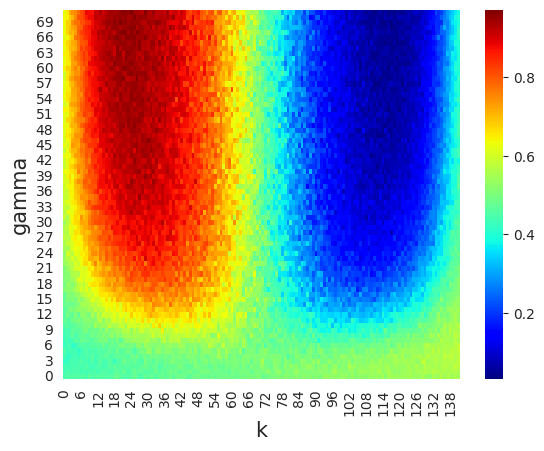

In [5]:

if __name__ == '__main__':

    np.random.seed(0)
    dim = 2
    varargin = {
        'step': 100000,  # how many steps to run the brain circuit before executing the next movement
        'tau': np.ones(dim),  # decay time constant
        'weights_in': np.ones(dim) * 1.,  # input weights
        'rs': np.ones(dim) * 0.5,  #
        'w': np.ones(dim) * 4.,  # weight of mutual inhibition
        'k': 7. * np.ones(dim),  # sigmoid center
        'n': 1.5 * np.ones(dim),  # sigmoid slope
        'bi': np.ones(dim) * 5.75,  # baseline production
        'dt': 0.4,  # size of timesteps
        'nsf': 0.,  # noise level
    }
    p_list = []
    for ni in tqdm(np.arange(0.5, 4.1, 0.05)):
        p_tmp = []
        for k in np.arange(4,11.1,0.05):
            varargin['n'] = ni * np.ones(dim)
            varargin['k'] = k * np.ones(dim)
            net = Lyapunov_Worm_multi_D(varargin=varargin)
            for t in range(1):
                net.decide_simulation(r1_mean=0, r2_mean=0,r1_std=2.,r2_std=0.5, save_history=True, init=False)
            p = net.get_choice_probability(0)
            p_tmp.append(p)
        p_list.append(p_tmp)

    p_list = np.array(p_list,dtype=float)
    np.save('saved2/k_n_simulate4', p_list)
    p_list = np.load('saved2/k_n_simulate4.npy')
    # p_list = p_list[0:70,0:130]
    sns.heatmap(data=p_list,cmap='jet')
    # plt.xticks(np.arange(0, 284, 20), np.arange(4, 11.1, 0.5).round(2), fontsize=8)
    # plt.yticks(np.arange(0, 144, 20), np.arange(0.5, 4.1, 0.5).round(2), fontsize=8)
    plt.xlabel('k', fontsize=15)
    plt.ylabel('gamma', fontsize=15)
    plt.xticks(size=10)
    plt.yticks(size=10)
    plt.gca().invert_yaxis()
    plt.show()

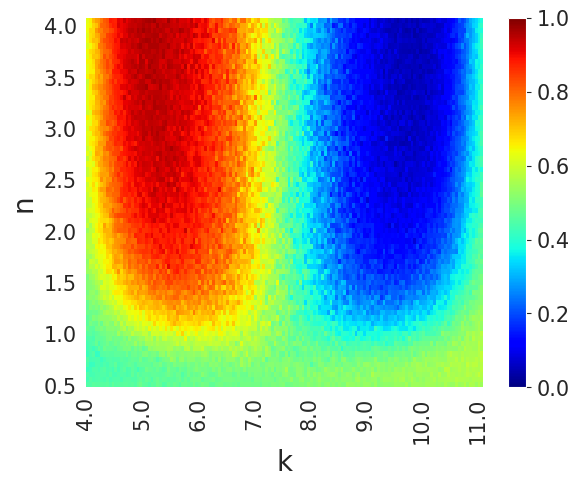

In [4]:
    p_list = np.load('saved2/k_n_simulate4.npy')
    h = sns.heatmap(data=p_list,cmap='jet',cbar=False,vmax=1,vmin=0)
    cb = h.figure.colorbar(h.collections[0])
    cb.ax.tick_params(labelsize=15)
    plt.gca().invert_yaxis()
    plt.xticks(np.arange(0, 142, 20), np.arange(4, 11.1, 1.).round(2), fontsize=15)
    plt.yticks(np.arange(0, 77, 10), np.arange(0.5, 4.1, 0.5).round(2), fontsize=15)
    plt.xlabel('k', fontsize=20)
    plt.ylabel('n', fontsize=20)
    plt.show()